# DDOS Attack Detection

# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


# Loading dataset

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df1=pd.read_csv("/home/Rithik/Downloads/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")#,nrows = 50000
df2=pd.read_csv("/home/Rithik/Downloads/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/home/Rithik/Downloads/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df6=pd.read_csv("/home/Rithik/Downloads/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")


df7=pd.read_csv("/home/Rithik/Downloads/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",encoding='cp1252')
df8=pd.read_csv("/home/Rithik/Downloads/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",encoding='cp1252')
df9=pd.read_csv("/home/Rithik/Downloads/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv",encoding='cp1252')
df12=pd.read_csv("/home/Rithik/Downloads/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX2.csv",encoding='unicode_escape')


# Dataset Description 

In [7]:
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df7.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df12.shape

(170366, 85)

In [10]:
df6.shape

(170366, 79)

# Grouping all web attacks

In [11]:
df12[' Label'].value_counts()

BENIGN                         168186
Web Attack Â Brute Force        1507
Web Attack Â XSS                 652
Web Attack Â Sql Injection        21
Name:  Label, dtype: int64

In [12]:
df6[' Label'].value_counts()

BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name:  Label, dtype: int64

In [13]:
df12.replace(['Web Attack Â Brute Force'], 'Web Attack', inplace=True)
df12.replace(['Web Attack Â XSS'], 'Web Attack', inplace=True)
df12.replace(['Web Attack Â Sql Injection'], 'Web Attack', inplace=True)
df6.replace(['Web Attack � Brute Force'], 'Web Attack', inplace=True)
df6.replace(['Web Attack � XSS'], 'Web Attack', inplace=True)
df6.replace(['Web Attack � Sql Injection'], 'Web Attack', inplace=True)


In [14]:
df6[' Label'].value_counts()

BENIGN        168186
Web Attack      2180
Name:  Label, dtype: int64

In [15]:
df12[' Label'].value_counts()

BENIGN        168186
Web Attack      2180
Name:  Label, dtype: int64

# Merging all DDoS, Web Attacks, Bot Attacks, Portscan Attack and Benign Packets

In [16]:
df13 = pd.concat([df2.reset_index(drop=True),df8.reset_index(drop=True)], axis=1)

df14 = pd.concat([df3.reset_index(drop=True),df9.reset_index(drop=True)], axis=1)

df16 = pd.concat([df6.reset_index(drop=True),df12.reset_index(drop=True)], axis=1)

df17 = pd.concat([df1.reset_index(drop=True),df7.reset_index(drop=True)], axis=1)

In [17]:
df13 = df13.loc[:,~df13.columns.duplicated()]
df14 = df14.loc[:,~df14.columns.duplicated()]
df16 = df16.loc[:,~df16.columns.duplicated()]
df17 = df17.loc[:,~df17.columns.duplicated()]

In [18]:
df = pd.concat([df17,df13])
df = pd.concat([df,df14])
df = pd.concat([df,df16])

In [19]:
df.shape

(873611, 85)

In [20]:
df = df.drop([' Timestamp'],axis = 1)

# Converting the data type of all the columns 

In [21]:
data = df.copy()
for column in data.columns:
    if data[column].dtype == np.int64:
        maxVal = data[column].max()
        if maxVal < 120:
            data[column] = data[column].astype(np.int8)
        elif maxVal < 32767:
            data[column] = data[column].astype(np.int16)
        else:
            data[column] = data[column].astype(np.int32)
            
    if data[column].dtype == np.float64:
        try:
            maxVal = data[column].max()
            minVal = data[data[column]>=0][column]
            if maxVal < 120:
                data[column] = data[column].astype(np.float16)
            else:
                data[column] = data[column].astype(np.float32)
        except:
            print(column)
            print(data[column].dtype)
            print(data[column].max())
            

In [22]:
data[' Label'] = data[' Label'].astype('category')
data[' Label'] = data[' Label'].astype("category").cat.codes

In [23]:
df[' Label'].value_counts()

BENIGN        582508
PortScan      158930
DDoS          128027
Web Attack      2180
Bot             1966
Name:  Label, dtype: int64

In [24]:
df[' Protocol'].value_counts()

6     602731
17    270432
0        448
Name:  Protocol, dtype: int64

In [25]:
data[' Label'].value_counts()

0    582508
3    158930
2    128027
4      2180
1      1966
Name:  Label, dtype: int64

# Selecting columns that are not required for the model

In [26]:
cols = [
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance',
        ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min',
       'Flow ID', ' Source IP',  ' Destination IP']


In [27]:
data = data.drop(cols,axis = 1)

In [28]:
data.shape

(873611, 17)

In [29]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Bwd Packets/s,Min Packet Length,Max Packet Length,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Label,Source Port,Protocol
0,54865,3,2,0.000000,6,6,0,0,0,0,1,0,0,0,0,443,6
1,55054,109,1,9174.311523,6,6,0,0,0,0,1,1,0,0,0,80,6
2,55055,52,1,19230.769531,6,6,0,0,0,0,1,1,0,0,0,80,6
3,46236,34,1,29411.765625,6,6,0,0,0,0,1,1,0,0,0,443,6
4,54863,3,2,0.000000,6,6,0,0,0,0,1,0,0,0,0,443,6


In [30]:
data[' Label'].value_counts()

0    582508
3    158930
2    128027
4      2180
1      1966
Name:  Label, dtype: int64

In [31]:
data.loc[data[' Label'] == 0].shape

(582508, 17)

In [32]:
data0 = data.loc[data[' Label'] == 0]
data1 = data.loc[data[' Label'] == 1]
data2 = data.loc[data[' Label'] == 2]
data3 = data.loc[data[' Label'] == 3]
data4 = data.loc[data[' Label'] == 4]

In [33]:
data0.shape

(582508, 17)

In [34]:
data0.head()

,Destination Port,Flow Duration,Total Fwd Packets,Bwd Packets/s,Min Packet Length,Max Packet Length,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Label,Source Port,Protocol
0,54865,3,2,0.000000,6,6,0,0,0,0,1,0,0,0,0,443,6
1,55054,109,1,9174.311523,6,6,0,0,0,0,1,1,0,0,0,80,6
2,55055,52,1,19230.769531,6,6,0,0,0,0,1,1,0,0,0,80,6
3,46236,34,1,29411.765625,6,6,0,0,0,0,1,1,0,0,0,443,6
4,54863,3,2,0.000000,6,6,0,0,0,0,1,0,0,0,0,443,6


In [35]:
data1.shape

(1966, 17)

In [36]:
data1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Bwd Packets/s,Min Packet Length,Max Packet Length,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Label,Source Port,Protocol
24072,8080,60202640,9,0.149495,0,322,0,0,0,1,0,0,0,0,1,42544,6
24677,8080,57891,1,17.273842,0,0,0,0,0,0,1,1,0,0,1,42544,6
56376,8080,134812,4,22.253212,0,194,0,0,0,1,0,0,0,0,1,1841,6
56401,1841,84,1,11904.761719,6,6,0,0,0,0,1,1,0,0,1,8080,6
56596,8080,127781,4,23.477669,0,194,0,0,0,1,0,0,0,0,1,1845,6


In [37]:
y0 = data0[' Label'].copy()
data0 = data0.drop([' Label'],axis=1)
y1 = data1[' Label'].copy()
data1 = data1.drop([' Label'],axis=1)
y2 = data2[' Label'].copy()
data2 = data2.drop([' Label'],axis=1)
y3 = data3[' Label'].copy()
data3 = data3.drop([' Label'],axis=1)
y4 = data4[' Label'].copy()
data4 = data4.drop([' Label'],axis=1)

In [38]:
y0.head()

0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int8

In [39]:
y0.shape

(582508,)

In [40]:
y1.shape

(1966,)

# Creating new dataset using the statistical methods 

In [41]:
import csv
import scipy as scipy
from scipy.stats import iqr

def create_new_dataset(filename,df,y):
    try:
        with open(filename,'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["dport_std", "dport_entropy", "dport_mean","dport_iqr", "dport_median_abs_dev", \
                             "fduration_std", "fduration_entropy", "fduration_mean","fduration_iqr", \
                             "fduration_median_abs_dev","t_fwd_pkt_std", "t_fwd_pkt_entropy", "t_fwd_pkt_mean", \
                             "t_fwd_pkt_iqr", "t_fwd_pkt_median_abs_dev","b_pkt_per_sec_std",\
                             "b_pkt_per_sec_entropy", "b_pkt_per_sec_mean","b_pkt_per_sec_iqr",\
                             "b_pkt_per_sec_median_abs_dev","min_pkt_len_std", "min_pkt_len_entropy",\
                             "min_pkt_len_mean","min_pkt_len_iqr", "min_pkt_len_median_abs_dev", \
                             "max_pkt_len_std", "max_pkt_len_entropy", "max_pkt_len_mean","max_pkt_len_iqr", \
                             "max_pkt_len_median_abs_dev","fin_flg_std", "fin_flg_entropy",\
                             "fin_flg_mean","fin_flg_iqr", "fin_flg_median_abs_dev","syn_flg_std",\
                             "syn_flg_entropy", "syn_flg_mean","syn_flg_iqr", "syn_flg_median_abs_dev",\
                             "rst_flg_std", "rst_flg_entropy", "rst_flg_mean","rst_flg_iqr", \
                             "rst_flg_median_abs_dev","psh_flg_std", "psh_flg_entropy",\
                             "psh_flg_mean","psh_flg_iqr", "psh_flg_median_abs_dev","ack_flg_std",\
                             "ack_flg_entropy", "ack_flg_mean","ack_flg_iqr", "ack_flg_median_abs_dev", \
                             "urg_flg_std", "urg_flg_entropy", "urg_flg_mean","urg_flg_iqr",\
                             "urg_flg_median_abs_dev","cwe_flg_std", "cwe_flg_entropy", "cwe_flg_mean",\
                             "cwe_flg_iqr", "cwe_flg_median_abs_dev","ece_flg_std", "ece_flg_entropy",\
                             "ece_flg_mean","ece_flg_iqr", "ece_flg_median_abs_dev","sport_std",\
                             "sport_entropy", "sport_mean","sport_iqr", "sport_median_abs_dev",\
                             "ip_proto_std", "ip_proto_entropy", "ip_proto_mean","ip_proto_iqr",\
                             "ip_proto_median_abs_dev"," Label"])
            i=0
            #print(df.iloc[0,0])
            while i < df.shape[0]:
                #print(i)

                j=0
                dataval=[]
                while j < df.shape[1]:
                    arr=[]

                    for x in range(0,10):
                        if j == df.shape[1] -1:
                            arr.append((df.iloc[i+x][j])/1000)
                        else:
                            arr.append(df.iloc[i+x][j])

                    val = scipy.std(arr)
                    val1 = scipy.stats.entropy(arr)
                    val2 = scipy.mean(arr)
                    val3 = iqr(arr)
                    val4 = scipy.stats.median_abs_deviation(arr)
                    if np.isnan(val):
                        val=0
                    if np.isnan(val1):
                        val1=0
                    if np.isnan(val2):
                        val2=0
                    if np.isnan(val3):
                        val3=0
                    if np.isnan(val4):
                        val4=0
                    dataval.append(val)
                    dataval.append(val1)
                    dataval.append(val2)
                    dataval.append(val3)
                    dataval.append(val4)

                    #print(arr)
                    #...append new dataframe

                    j=j+1
                tval = {}
                for x in range(0,10):
                    if y.iloc[i+x] not in tval:
                        tval[y.iloc[i+x]] = 1
                    else:
                        tval[y.iloc[i+x]] += 1
                Keymax = max(tval, key=tval.get)
                dataval.append(Keymax)
                #print(dataval)
                writer.writerow(dataval)
                i=i+10
                
    except Exception as e:
        
        print("Reached end")

In [42]:
create_new_dataset('Benign.csv',data0,y0)

Reached end


In [43]:
create_new_dataset('Bot.csv',data1,y1)

Reached end


In [44]:
create_new_dataset('Ddos_attack.csv',data2,y2)

Reached end


In [45]:
create_new_dataset('Portmap.csv',data3,y3)

In [46]:
create_new_dataset('webAttack.csv',data4,y4)

In [47]:
file0 = pd.read_csv('Benign.csv')
file1 = pd.read_csv('Bot.csv')
file2 = pd.read_csv('Ddos_attack.csv')
file3 = pd.read_csv('Portmap.csv')
file4 = pd.read_csv('webAttack.csv')

In [48]:
file0.head()

,dport_std,dport_entropy,dport_mean,dport_iqr,dport_median_abs_dev,fduration_std,fduration_entropy,fduration_mean,fduration_iqr,fduration_median_abs_dev,t_fwd_pkt_std,t_fwd_pkt_entropy,t_fwd_pkt_mean,t_fwd_pkt_iqr,t_fwd_pkt_median_abs_dev,b_pkt_per_sec_std,b_pkt_per_sec_entropy,b_pkt_per_sec_mean,b_pkt_per_sec_iqr,b_pkt_per_sec_median_abs_dev,min_pkt_len_std,min_pkt_len_entropy,min_pkt_len_mean,min_pkt_len_iqr,min_pkt_len_median_abs_dev,max_pkt_len_std,max_pkt_len_entropy,max_pkt_len_mean,max_pkt_len_iqr,max_pkt_len_median_abs_dev,fin_flg_std,fin_flg_entropy,fin_flg_mean,fin_flg_iqr,fin_flg_median_abs_dev,syn_flg_std,syn_flg_entropy,syn_flg_mean,syn_flg_iqr,syn_flg_median_abs_dev,rst_flg_std,rst_flg_entropy,rst_flg_mean,rst_flg_iqr,rst_flg_median_abs_dev,psh_flg_std,psh_flg_entropy,psh_flg_mean,psh_flg_iqr,psh_flg_median_abs_dev,ack_flg_std,ack_flg_entropy,ack_flg_mean,ack_flg_iqr,ack_flg_median_abs_dev,urg_flg_std,urg_flg_entropy,urg_flg_mean,urg_flg_iqr,urg_flg_median_abs_dev,cwe_flg_std,cwe_flg_entropy,cwe_flg_mean,cwe_flg_iqr,cwe_flg_median_abs_dev,ece_flg_std,ece_flg_entropy,ece_flg_mean,ece_flg_iqr,ece_flg_median_abs_dev,sport_std,sport_entropy,sport_mean,sport_iqr,sport_median_abs_dev,ip_proto_std,ip_proto_entropy,ip_proto_mean,ip_proto_iqr,ip_proto_median_abs_dev,Label
0,13664.008237,2.247823,49522.9,158.25,95.5,299.830302,0.810144,127.7,45.50,16.0,0.489898,2.252728,1.6,1.0,0.0,11043.773913,1.313432,8162.637012,16716.655029,0.000000,0.000000,2.302585,6.0,0.0,0.0,7.500000,2.051962,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.458258,1.098612,0.3,0.75,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.200000,2.197532,370.4,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
1,5470.697020,2.296566,52451.9,1619.25,809.5,80.190773,1.385442,57.8,100.50,2.5,0.640312,2.231607,1.7,1.0,0.5,5766.438138,1.231826,3767.070068,5916.154907,0.000000,2.939388,1.386294,2.4,6.0,0.0,15.186836,1.386294,12.4,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458258,1.098612,0.3,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
2,18132.528154,2.188389,44368.4,9350.25,957.5,18.142767,1.476882,12.2,1.50,1.0,0.640312,2.260937,2.3,1.0,0.5,5555.555273,0.000000,1851.851758,0.000000,0.000000,8.532878,1.653096,6.7,4.5,0.0,81.393120,1.421153,56.4,29.5,28.0,0.0,0.0,0.0,0.0,0.0,0.489898,1.386294,0.4,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
3,23171.855162,2.066372,37121.5,46317.75,2674.5,223.863374,0.944874,113.7,76.50,0.0,0.447214,2.276423,2.0,0.0,0.0,2840.864595,0.376192,1088.066162,0.000000,0.000000,0.000000,2.302585,6.0,0.0,0.0,12.247449,2.100803,21.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.609438,0.5,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
4,23193.177850,1.888410,24049.2,36900.75,312.5,37.508532,1.865697,41.1,58.25,29.5,0.489898,2.242973,1.4,1.0,0.0,22497.546018,1.513887,17518.402686,15692.640625,11417.982178,0.000000,2.302585,6.0,0.0,0.0,0.000000,2.302585,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.489898,1.791759,0.6,1.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.832955,1.990809,225.2,363.0,0.0,0.0,2.302585,0.006,0.0,0.0,0


In [49]:
file2.head()

,dport_std,dport_entropy,dport_mean,dport_iqr,dport_median_abs_dev,fduration_std,fduration_entropy,fduration_mean,fduration_iqr,fduration_median_abs_dev,t_fwd_pkt_std,t_fwd_pkt_entropy,t_fwd_pkt_mean,t_fwd_pkt_iqr,t_fwd_pkt_median_abs_dev,b_pkt_per_sec_std,b_pkt_per_sec_entropy,b_pkt_per_sec_mean,b_pkt_per_sec_iqr,b_pkt_per_sec_median_abs_dev,min_pkt_len_std,min_pkt_len_entropy,min_pkt_len_mean,min_pkt_len_iqr,min_pkt_len_median_abs_dev,max_pkt_len_std,max_pkt_len_entropy,max_pkt_len_mean,max_pkt_len_iqr,max_pkt_len_median_abs_dev,fin_flg_std,fin_flg_entropy,fin_flg_mean,fin_flg_iqr,fin_flg_median_abs_dev,syn_flg_std,syn_flg_entropy,syn_flg_mean,syn_flg_iqr,syn_flg_median_abs_dev,rst_flg_std,rst_flg_entropy,rst_flg_mean,rst_flg_iqr,rst_flg_median_abs_dev,psh_flg_std,psh_flg_entropy,psh_flg_mean,psh_flg_iqr,psh_flg_median_abs_dev,ack_flg_std,ack_flg_entropy,ack_flg_mean,ack_flg_iqr,ack_flg_median_abs_dev,urg_flg_std,urg_flg_entropy,urg_flg_mean,urg_flg_iqr,urg_flg_median_abs_dev,cwe_flg_std,cwe_flg_entropy,cwe_flg_mean,cwe_flg_iqr,cwe_flg_median_abs_dev,ece_flg_std,ece_flg_entropy,ece_flg_mean,ece_flg_iqr,ece_flg_median_abs_dev,sport_std,sport_entropy,sport_mean,sport_iqr,sport_median_abs_dev,ip_proto_std,ip_proto_entropy,ip_proto_mean,ip_proto_iqr,ip_proto_median_abs_dev,Label
0,0.0,2.302585,80.0,0.0,0.0,3.835323e+07,1.506626,32707520.7,78790637.75,2383181.5,2.385372,2.195228,5.1,5.0,0.5,5.997817,1.505370,4.744582,6.824975,2.718164,1.8,0.000000,0.6,0.0,0.0,3050.227998,2.148914,6407.6,2190.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.5,1.609438,0.5,1.0,0.5,0.5,1.609438,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,814.501074,2.302458,51279.0,3.0,2.0,0.0,2.302585,0.006,0.0,0.0,2
1,0.0,2.302585,80.0,0.0,0.0,3.447858e+07,1.412399,25885671.5,60148558.25,5518983.0,2.051828,2.212616,4.7,3.5,0.5,1095.452015,0.370947,413.224565,7.818098,2.361004,2.4,0.693147,1.2,0.0,0.0,2301.635975,2.063779,4235.2,1460.0,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.5,1.609438,0.5,1.0,0.5,0.5,1.609438,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1056.792014,2.302368,50827.8,2157.0,3.0,0.0,2.302585,0.006,0.0,0.0,2
2,0.0,2.302585,80.0,0.0,0.0,5.205632e+06,1.610827,5207095.3,10409957.00,5200151.0,0.500000,2.292346,3.5,1.0,0.5,2090.535309,1.603765,2066.553442,3878.816956,1870.324219,3.0,1.609438,3.0,6.0,3.0,2673.278324,1.608849,2631.0,5469.0,2187.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.5,1.609438,0.5,1.0,0.5,0.5,1.609438,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.414214,2.302585,49537.0,2.0,1.0,0.0,2.302585,0.006,0.0,0.0,2
3,0.0,2.302585,80.0,0.0,0.0,4.024260e+06,1.864783,4770535.4,7637055.25,3731351.0,0.500000,2.292346,3.5,1.0,0.5,33.142552,0.832397,14.799018,8.012911,1.812187,3.0,1.609438,3.0,6.0,3.0,2976.818814,1.605528,2914.5,5834.0,2187.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.5,1.609438,0.5,1.0,0.5,0.5,1.609438,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.104978,2.302585,49565.4,50.0,22.0,0.0,2.302585,0.006,0.0,0.0,2
4,0.0,2.302585,80.0,0.0,0.0,4.072568e+06,1.674228,4208409.8,8384598.25,4193114.0,0.663325,2.286100,3.6,1.0,0.5,439.413894,1.168779,265.543445,340.019249,4.485854,3.0,1.609438,3.0,6.0,3.0,2801.601149,1.612033,2777.0,5834.0,2187.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.5,1.609438,0.5,1.0,0.5,0.5,1.609438,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.414214,2.302585,49596.0,2.0,1.0,0.0,2.302585,0.006,0.0,0.0,2


In [50]:
file0.shape

(58250, 81)

In [51]:
file1.shape

(196, 81)

In [52]:
file2.shape

(12802, 81)

In [53]:
file3.shape

(15893, 81)

In [54]:
file4.shape

(218, 81)

In [55]:
dataframe1 = pd.concat([file0,file1])
dataframe2 = pd.concat([dataframe1,file2])
dataframe3 = pd.concat([dataframe2,file3])
dataframe = pd.concat([dataframe3,file4])

In [56]:
dataframe.shape

(87359, 81)

In [57]:
dataframe.head()

,dport_std,dport_entropy,dport_mean,dport_iqr,dport_median_abs_dev,fduration_std,fduration_entropy,fduration_mean,fduration_iqr,fduration_median_abs_dev,t_fwd_pkt_std,t_fwd_pkt_entropy,t_fwd_pkt_mean,t_fwd_pkt_iqr,t_fwd_pkt_median_abs_dev,b_pkt_per_sec_std,b_pkt_per_sec_entropy,b_pkt_per_sec_mean,b_pkt_per_sec_iqr,b_pkt_per_sec_median_abs_dev,min_pkt_len_std,min_pkt_len_entropy,min_pkt_len_mean,min_pkt_len_iqr,min_pkt_len_median_abs_dev,max_pkt_len_std,max_pkt_len_entropy,max_pkt_len_mean,max_pkt_len_iqr,max_pkt_len_median_abs_dev,fin_flg_std,fin_flg_entropy,fin_flg_mean,fin_flg_iqr,fin_flg_median_abs_dev,syn_flg_std,syn_flg_entropy,syn_flg_mean,syn_flg_iqr,syn_flg_median_abs_dev,rst_flg_std,rst_flg_entropy,rst_flg_mean,rst_flg_iqr,rst_flg_median_abs_dev,psh_flg_std,psh_flg_entropy,psh_flg_mean,psh_flg_iqr,psh_flg_median_abs_dev,ack_flg_std,ack_flg_entropy,ack_flg_mean,ack_flg_iqr,ack_flg_median_abs_dev,urg_flg_std,urg_flg_entropy,urg_flg_mean,urg_flg_iqr,urg_flg_median_abs_dev,cwe_flg_std,cwe_flg_entropy,cwe_flg_mean,cwe_flg_iqr,cwe_flg_median_abs_dev,ece_flg_std,ece_flg_entropy,ece_flg_mean,ece_flg_iqr,ece_flg_median_abs_dev,sport_std,sport_entropy,sport_mean,sport_iqr,sport_median_abs_dev,ip_proto_std,ip_proto_entropy,ip_proto_mean,ip_proto_iqr,ip_proto_median_abs_dev,Label
0,13664.008237,2.247823,49522.9,158.25,95.5,299.830302,0.810144,127.7,45.50,16.0,0.489898,2.252728,1.6,1.0,0.0,11043.773913,1.313432,8162.637012,16716.655029,0.000000,0.000000,2.302585,6.0,0.0,0.0,7.500000,2.051962,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.458258,1.098612,0.3,0.75,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.200000,2.197532,370.4,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
1,5470.697020,2.296566,52451.9,1619.25,809.5,80.190773,1.385442,57.8,100.50,2.5,0.640312,2.231607,1.7,1.0,0.5,5766.438138,1.231826,3767.070068,5916.154907,0.000000,2.939388,1.386294,2.4,6.0,0.0,15.186836,1.386294,12.4,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458258,1.098612,0.3,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
2,18132.528154,2.188389,44368.4,9350.25,957.5,18.142767,1.476882,12.2,1.50,1.0,0.640312,2.260937,2.3,1.0,0.5,5555.555273,0.000000,1851.851758,0.000000,0.000000,8.532878,1.653096,6.7,4.5,0.0,81.393120,1.421153,56.4,29.5,28.0,0.0,0.0,0.0,0.0,0.0,0.489898,1.386294,0.4,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
3,23171.855162,2.066372,37121.5,46317.75,2674.5,223.863374,0.944874,113.7,76.50,0.0,0.447214,2.276423,2.0,0.0,0.0,2840.864595,0.376192,1088.066162,0.000000,0.000000,0.000000,2.302585,6.0,0.0,0.0,12.247449,2.100803,21.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.609438,0.5,1.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.300000,0.000000,0.1,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.900000,2.250758,406.7,0.0,0.0,0.0,2.302585,0.006,0.0,0.0,0
4,23193.177850,1.888410,24049.2,36900.75,312.5,37.508532,1.865697,41.1,58.25,29.5,0.489898,2.242973,1.4,1.0,0.0,22497.546018,1.513887,17518.402686,15692.640625,11417.982178,0.000000,2.302585,6.0,0.0,0.0,0.000000,2.302585,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302585,1.0,0.0,0.0,0.489898,1.791759,0.6,1.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.832955,1.990809,225.2,363.0,0.0,0.0,2.302585,0.006,0.0,0.0,0


# Combine Dataset

In [58]:
dataframe.to_csv('Ddos_attacks_detection.csv',index=False)

In [59]:
y = dataframe[' Label'].copy()
X = dataframe.drop([' Label'],axis=1)

In [60]:
X.replace([np.inf, -np.inf], 0.0, inplace=True)

In [61]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [62]:
y.value_counts()

0    58250
3    15893
2    12802
4      218
1      196
Name:  Label, dtype: int64

# Over Sampling and Under Sampling

In [63]:
df = X
df['Label'] = y
minor = pd.DataFrame(df[(df['Label']!=3) & (df['Label']!=2) & (df['Label']!=0)])
major = pd.DataFrame(df[(df['Label']==3) | (df['Label']==2) | (df['Label']==0) ] )
minor['Label'].value_counts()

4    218
1    196
Name: Label, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
y_rus_ =  minor['Label']
X_rus_ =  minor.drop(['Label'],axis=1)
strategy = {1:2000,4:2500}
sm = SMOTE(sampling_strategy=strategy)
X_sm, y_sm = sm.fit_resample(X_rus_, y_rus_)
X_min,y_min = X_sm, y_sm 

In [65]:
major['Label'].value_counts()

0    58250
3    15893
2    12802
Name: Label, dtype: int64

In [66]:
from imblearn.under_sampling import RandomUnderSampler
y_rus_ =  major['Label']
X_rus_ =  major.drop(['Label'],axis=1)
strategy = {0:30000, 3:12000, 2:10000}
tom = RandomUnderSampler(sampling_strategy=strategy)
X_tom, y_tom = tom.fit_resample(X_rus_, y_rus_)
y_tom.value_counts()

0    30000
3    12000
2    10000
Name: Label, dtype: int64

In [67]:
X_maj,y_maj = X_tom, y_tom
X,Y = pd.concat([X_maj,X_min]), pd.concat([y_maj,y_min])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56500 entries, 0 to 4499
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dport_std                     56500 non-null  float64
 1   dport_entropy                 56500 non-null  float64
 2   dport_mean                    56500 non-null  float64
 3   dport_iqr                     56500 non-null  float64
 4   dport_median_abs_dev          56500 non-null  float64
 5   fduration_std                 56500 non-null  float64
 6   fduration_entropy             56500 non-null  float64
 7   fduration_mean                56500 non-null  float64
 8   fduration_iqr                 56500 non-null  float64
 9   fduration_median_abs_dev      56500 non-null  float64
 10  t_fwd_pkt_std                 56500 non-null  float64
 11  t_fwd_pkt_entropy             56500 non-null  float64
 12  t_fwd_pkt_mean                56500 non-null  float64
 13  t_

In [68]:
Y.shape

(56500,)

In [69]:
X.shape

(56500, 80)

# Feature Selection 

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def check_threshold_by_class(dataArray, value):
    result = False
    for i in range(len(dataArray)):
        if dataArray[i] < value:
            result = True
            break
    return result

model_count = 1
precision_threshold = 0.95
trashold_by_class = 0.85
imp_threshold = 0.99
n_exec = 7
result_metrics=None
for i in range(n_exec):
    feature_list = list(X.columns)
    features = X
    labels = Y
    while True:
        

        train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.25,shuffle=True)

        rf = RandomForestClassifier()

        rf.fit(train_features, train_labels)

        importances = list(rf.feature_importances_)

        

        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

        feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

        sorted_importances = [importance[1] for importance in feature_importances]
        sorted_features = [importance[0] for importance in feature_importances]

        cumulative_importances = np.cumsum(sorted_importances)
        
        if max(cumulative_importances) < imp_threshold:
            print('!!!!! Low importance !!!!!!!' )
            break


        n_importante_features = np.where(cumulative_importances >= imp_threshold)[0][0]

        if n_importante_features < 2:
            print('###### Less than 2 variables #######' )
            break
        
        important_feature_names = [feature[0] for feature in feature_importances[0:n_importante_features]]
        
        print(len(important_feature_names))
        important_indices = [feature_list.index(feature) for feature in important_feature_names]
        
        important_train_features = train_features.iloc[:, important_indices]
        important_test_features = test_features.iloc[:, important_indices]

        rf = RandomForestClassifier()
        # Train the expanded model on only the important features
        rf.fit(important_train_features, train_labels)
        
        # Make predictions on test data
        predictions = rf.predict(important_test_features)
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions, average='weighted')
        recall = recall_score(test_labels, predictions, average='weighted')
        f1score = f1_score(test_labels, predictions, average='weighted')
        per_class_precision_ = precision_score(test_labels, predictions, average=None)
        print(precision)
        if precision < precision_threshold or check_threshold_by_class(per_class_precision_,trashold_by_class):
                print('***| Stopping-2 |***')
                print('Model: ', model_count)
                print('===> Low precision <===')
                print('Global precision: ', precision)
                print('Per class precision: ', per_class_precision_)
                print('Total of importante features: ', n_importante_features)
                break
        
        if result_metrics is None:
            result_metrics = pd.DataFrame({
                'model': [model_count for j in range(len(sorted_features))],
                'n_variables': [len(sorted_features) for j in range(len(sorted_features))],
                'variables': sorted_features,
                'importance': sorted_importances,
                'accuracy': [accuracy for j in range(len(sorted_features))],
                'precision': [precision for j in range(len(sorted_features))],
                'recall': [recall for j in range(len(sorted_features))],
                'f1score': [f1score for j in range(len(sorted_features))]
            })
        else:
            result_metrics = result_metrics.append(pd.DataFrame({
                'model': [model_count for j in range(len(sorted_features))],
                'n_variables': [len(sorted_features) for j in range(len(sorted_features))],
                'variables': sorted_features,
                'importance': sorted_importances,
                'accuracy': [accuracy for j in range(len(sorted_features))],
                'precision': [precision for j in range(len(sorted_features))],
                'recall': [recall for j in range(len(sorted_features))],
                'f1score': [f1score for j in range(len(sorted_features))]
            }))

        print('------------------------------------| SUMMARY |------------------------------------')
        print('Execution:', i, ', Model:', model_count)
        print('Number of features for', imp_threshold * 100, '% importance:', n_importante_features)
        print('Selected variables: ', sorted_features)
        
        print('-----------------------------------------------------------------------------------')
        print('Precision: ', precision)
        print('Accuracy: ', accuracy)
        print('-----------------------------------------------------------------------------------')

        
        features = features.iloc[:, important_indices]
        
        feature_list = list(features.columns)
        
        model_count += 1
        


39
0.9998584447523666
------------------------------------| SUMMARY |------------------------------------
Execution: 0 , Model: 1
Number of features for 99.0 % importance: 39
Selected variables:  ['max_pkt_len_std', 'max_pkt_len_mean', 'psh_flg_entropy', 'sport_std', 'sport_entropy', 'dport_mean', 'fduration_std', 'fduration_mean', 'fduration_iqr', 'max_pkt_len_entropy', 'psh_flg_mean', 'dport_entropy', 'b_pkt_per_sec_mean', 'min_pkt_len_std', 'max_pkt_len_iqr', 'sport_iqr', 'dport_std', 'dport_median_abs_dev', 'fduration_median_abs_dev', 't_fwd_pkt_entropy', 't_fwd_pkt_mean', 'b_pkt_per_sec_iqr', 'b_pkt_per_sec_median_abs_dev', 'min_pkt_len_mean', 'max_pkt_len_median_abs_dev', 'sport_median_abs_dev', 'ip_proto_mean', 'dport_iqr', 'fduration_entropy', 't_fwd_pkt_std', 't_fwd_pkt_iqr', 'b_pkt_per_sec_std', 'b_pkt_per_sec_entropy', 'psh_flg_std', 'ack_flg_entropy', 'ack_flg_mean', 'urg_flg_std', 'urg_flg_entropy', 'urg_flg_mean', 'sport_mean', 't_fwd_pkt_median_abs_dev', 'min_pkt_len_ent

!!!!! Low importance !!!!!!!
!!!!! Low importance !!!!!!!
37
0.9999292315669251
------------------------------------| SUMMARY |------------------------------------
Execution: 5 , Model: 8
Number of features for 99.0 % importance: 37
Selected variables:  ['fduration_mean', 'fduration_std', 'max_pkt_len_mean', 'sport_std', 'dport_mean', 'fduration_iqr', 'max_pkt_len_std', 'max_pkt_len_entropy', 'max_pkt_len_iqr', 'sport_entropy', 'sport_iqr', 'dport_std', 'dport_entropy', 'fduration_median_abs_dev', 't_fwd_pkt_mean', 'b_pkt_per_sec_mean', 'min_pkt_len_std', 'psh_flg_mean', 'sport_median_abs_dev', 'ip_proto_mean', 'dport_iqr', 'b_pkt_per_sec_iqr', 'b_pkt_per_sec_median_abs_dev', 'min_pkt_len_mean', 'psh_flg_entropy', 'dport_median_abs_dev', 'fduration_entropy', 't_fwd_pkt_std', 't_fwd_pkt_entropy', 't_fwd_pkt_iqr', 'b_pkt_per_sec_std', 'b_pkt_per_sec_entropy', 'max_pkt_len_median_abs_dev', 'psh_flg_std', 'psh_flg_median_abs_dev', 'ack_flg_entropy', 'ack_flg_mean', 'urg_flg_std', 'urg_flg_

18
0.9995753822374689
------------------------------------| SUMMARY |------------------------------------
Execution: 5 , Model: 16
Number of features for 99.0 % importance: 18
Selected variables:  ['max_pkt_len_mean', 'fduration_mean', 'max_pkt_len_std', 'fduration_iqr', 'sport_std', 'sport_entropy', 'fduration_std', 'sport_iqr', 'max_pkt_len_entropy', 'max_pkt_len_iqr', 'psh_flg_entropy', 'dport_mean', 't_fwd_pkt_mean', 'dport_std', 'b_pkt_per_sec_iqr', 'b_pkt_per_sec_mean', 'fduration_median_abs_dev', 'sport_median_abs_dev', 'min_pkt_len_mean']
-----------------------------------------------------------------------------------
Precision:  0.9995753822374689
Accuracy:  0.999575221238938
-----------------------------------------------------------------------------------
17
0.9997876571129822
------------------------------------| SUMMARY |------------------------------------
Execution: 5 , Model: 17
Number of features for 99.0 % importance: 17
Selected variables:  ['max_pkt_len_mean', '

In [71]:
result_df = result_metrics.groupby(by=['n_variables'], as_index=False).agg({'model':['count']}).sort_values(by=['n_variables'])
result_df = pd.DataFrame({'n_variables':np.array(result_df['n_variables']),
                          'model': np.array([i[0] for i in result_df['model'].values])})

result_df = result_df[np.abs(result_df.model-result_df.model.mean()) <= (3*result_df.model.std())]

x = np.array(result_df['n_variables'].values)
y = np.array(result_df['model'].values)

#Select best number of variables of all models
best_num_var = x[y.argmax()]


In [72]:
result_metrics

,model,n_variables,variables,importance,accuracy,precision,recall,f1score
0,1,80,max_pkt_len_std,0.05,0.999858,0.999858,0.999858,0.999858
1,1,80,max_pkt_len_mean,0.05,0.999858,0.999858,0.999858,0.999858
2,1,80,psh_flg_entropy,0.05,0.999858,0.999858,0.999858,0.999858
3,1,80,sport_std,0.05,0.999858,0.999858,0.999858,0.999858
4,1,80,sport_entropy,0.05,0.999858,0.999858,0.999858,0.999858
5,1,80,dport_mean,0.04,0.999858,0.999858,0.999858,0.999858
6,1,80,fduration_std,0.04,0.999858,0.999858,0.999858,0.999858
7,1,80,fduration_mean,0.04,0.999858,0.999858,0.999858,0.999858
8,1,80,fduration_iqr,0.04,0.999858,0.999858,0.999858,0.999858
9,1,80,max_pkt_len_entropy,0.04,0.999858,0.999858,0.999858,0.999858


In [73]:
result_df

,n_variables,model
0,16,16
1,17,17
2,18,18
3,19,19
4,20,20
5,22,22
6,23,23
7,24,24
8,27,54
9,29,58


In [74]:
best_num_var

37

In [75]:
result_df = result_metrics[result_metrics['n_variables'] == best_num_var] # <== Filter
result_df = result_df.groupby(by=['variables'], as_index=False).agg({'importance':['mean']}).sort_values(by=[('importance', 'mean')])
    

In [76]:
x = np.array(result_df['variables'].values)
y = np.array([round(i[0],4) for i in result_df['importance'].values])

In [77]:
x = x[len(x)-best_num_var:len(x)]
y = y[len(x)-best_num_var:len(x)]

best_variables = x

## Selected features

In [78]:
best_variables

array(['ack_flg_entropy', 't_fwd_pkt_std', 't_fwd_pkt_iqr',
       't_fwd_pkt_entropy', 'psh_flg_median_abs_dev', 'urg_flg_entropy',
       'ip_proto_mean', 'dport_median_abs_dev', 'urg_flg_std',
       'dport_iqr', 'ack_flg_mean', 'b_pkt_per_sec_entropy',
       'b_pkt_per_sec_std', 'fduration_median_abs_dev',
       'b_pkt_per_sec_median_abs_dev', 'dport_entropy', 'dport_std',
       'min_pkt_len_mean', 'max_pkt_len_median_abs_dev',
       'min_pkt_len_std', 'b_pkt_per_sec_iqr', 'psh_flg_entropy',
       'psh_flg_mean', 'sport_median_abs_dev', 'b_pkt_per_sec_mean',
       'sport_iqr', 't_fwd_pkt_mean', 'max_pkt_len_iqr', 'dport_mean',
       'fduration_iqr', 'max_pkt_len_mean', 'max_pkt_len_entropy',
       'sport_entropy', 'fduration_mean', 'fduration_std', 'sport_std',
       'max_pkt_len_std'], dtype=object)

In [79]:
X.shape

(56500, 80)

In [80]:
X = X[best_variables]

In [81]:
X.shape

(56500, 37)

In [82]:
Y.shape

(56500,)

In [83]:
scaler = StandardScaler()

# scale it to have zero mean and unit variance 
cols = X.select_dtypes(include=['float64','float32','float16','int8']).columns
train_X = scaler.fit_transform(X.select_dtypes(include=['float64','float32','float16','int8']))


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.70,shuffle=True)


# Hyper Parameter Tuning

In [84]:
rf = RandomForestClassifier(max_depth=40)

from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [86]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.9min
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time= 4.1min
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  46.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.9min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  29.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.3min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 5.8min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.8min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 2.3min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.9min
[CV] END bootstrap=True, max_depth=40

[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.9min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 3.0min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  45.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time= 2.8min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.1min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  22.6s
[CV] END bootstrap=True, max_depth=50

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=2)

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.7min
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time= 1.8min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 5.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  44.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 2.3min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time= 2.2min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.4s
[CV] END bootstrap=False, max_depth=100, 

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.6min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.2min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 5.7min
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  21.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 3.6min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.8min
[CV] END bootstrap=True, max_depth=50,

In [98]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [107]:
dctree = tree.DecisionTreeClassifier()

from pprint import pprint

print('Parameters currently in use:\n')
pprint(dctree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [135]:
from sklearn.model_selection import RandomizedSearchCV


# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

splitter = ['best', 'random']

criterion = ['gini','entropy']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter':splitter,
               'criterion':criterion
               }

pprint(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'splitter': ['best', 'random']}


In [138]:
dctree = tree.DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation
dctree_random = RandomizedSearchCV(estimator=dctree, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)

dctree_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=2)

In [139]:
dctree_random.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 90,
 'criterion': 'gini'}

In [63]:
ada = AdaBoostClassifier(DecisionTreeClassifier())

from pprint import pprint

print('Parameters currently in use:\n')
pprint(ada.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'base_estimator__max_features': max_features,
               'base_estimator__max_depth': max_depth,
               'base_estimator__min_samples_split': min_samples_split,
               'base_estimator__min_samples_leaf': min_samples_leaf
               }

pprint(random_grid)

{'base_estimator__max_depth': [10,
                               20,
                               30,
                               40,
                               50,
                               60,
                               70,
                               80,
                               90,
                               100,
                               110,
                               None],
 'base_estimator__max_features': ['auto', 'sqrt'],
 'base_estimator__min_samples_leaf': [1, 2, 4],
 'base_estimator__min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [67]:
ada = AdaBoostClassifier(DecisionTreeClassifier())
# Random search of parameters, using 3 fold cross validation
ada_random = RandomizedSearchCV(estimator=ada, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)

ada_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [10, 20,
                                                                      30, 40,
                                                                      50, 60,
                                                                      70, 80,
                                                                      90, 100,
                                                                      110,
                                                                      None],
                                        'base_estimator__max_features': ['auto',
                                                                         'sqrt'],
                                        'base_estimator__min_samples_leaf': [1,
                                                                     

In [68]:
ada_random.best_params_

{'n_estimators': 1200,
 'base_estimator__min_samples_split': 5,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_depth': 10}

In [48]:
# Train Random Forest
RFC_Classifier = RandomForestClassifier(n_estimators= 600,
min_samples_split= 2,
min_samples_leaf= 1,
max_features= 'sqrt',max_depth= 80,
bootstrap= False,
criterion= 'gini')

RFC_Classifier.fit(X_train, Y_train)
print ('RF Classifier run')

# Train ADABoost Classifier
ADA_Classifier = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split= 5,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 10),n_estimators=1200)
ADA_Classifier.fit(X_train, Y_train)
print ('ADABoost Classifier run')

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(splitter= 'best',
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'log2',
 max_depth= 90,
 criterion= 'gini')

DTC_Classifier.fit(X_train, Y_train)
print ('DTC Classifier run')

KeyboardInterrupt: 

In [51]:
from sklearn import metrics

In [82]:
from sklearn import metrics

models = []

models.append(('ADA boost Classifier', ADA_Classifier))
models.append(('Random Forest Classifier',RFC_Classifier))
models.append(('DTC Classifier', DTC_Classifier))



for i, v in models:
    Xpred =  v.predict(X_train)
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, Xpred)
    confusion_matrix = metrics.confusion_matrix(Y_train, Xpred)
    classification = metrics.classification_report(Y_train, Xpred)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== ADA boost Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9998482932996205

Model Accuracy:
 1.0

Confusion matrix:
 [[20999     0     0     0     0]
 [    0  1385     0     0     0]
 [    0     0  6973     0     0]
 [    0     0     0  8437     0]
 [    0     0     0     0  1756]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20999
           1       1.00      1.00      1.00      1385
           2       1.00      1.00      1.00      6973
           3       1.00      1.00      1.00      8437
           4       1.00      1.00      1.00      1756

    accuracy                           1.00     39550
   macro avg       1.00      1.00      1.00     39550
weighted avg       1.00      1.00      1.00     39550



============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mea

In [83]:
for i, v in models:
    pred = v.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test,pred)
    confusion_matrix = metrics.confusion_matrix(Y_test, pred)
    classification = metrics.classification_report(Y_test, pred)
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()    


============================== ADA boost Classifier Model Test Results ==============================

Model Accuracy:
 0.9994100294985251

Confusion matrix:
 [[9000    0    1    0    0]
 [   7  608    0    0    0]
 [   2    0 3025    0    0]
 [   0    0    0 3563    0]
 [   0    0    0    0  744]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9001
           1       1.00      0.99      0.99       615
           2       1.00      1.00      1.00      3027
           3       1.00      1.00      1.00      3563
           4       1.00      1.00      1.00       744

    accuracy                           1.00     16950
   macro avg       1.00      1.00      1.00     16950
weighted avg       1.00      1.00      1.00     16950



============================== Random Forest Classifier Model Test Results ==============================

Model Accuracy:
 0.9992920353982301

Confusion matrix:
 [[9000    0    1    

In [49]:
from sklearn.ensemble import VotingClassifier

RFC_Classifier = RandomForestClassifier(n_estimators= 600,
min_samples_split= 2,
min_samples_leaf= 1,
max_features= 'sqrt',max_depth= 80,
bootstrap= False,
criterion= 'gini')

ADA_Classifier = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split= 5,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 10),n_estimators=1200)

DTC_Classifier = tree.DecisionTreeClassifier(splitter= 'best',
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'log2',
 max_depth= 90,
 criterion= 'gini')

votingC = VotingClassifier(estimators=[('ada',ADA_Classifier), ('rf', RFC_Classifier),('dtc',DTC_Classifier)],voting='hard', weights=[2,2,1],flatten_transform=True)
votingC.fit(X_train,Y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                       max_features='auto',
                                                                                       min_samples_leaf=2,
                                                                                       min_samples_split=5),
                                                 n_estimators=1200)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=80,
                                                     max_features='sqrt',
                                                     n_estimators=600)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=90,
                                            

In [63]:
pred = votingC.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,pred)
confusion_matrix = metrics.confusion_matrix(Y_test, pred)
classification = metrics.classification_report(Y_test, pred)
print()
print('============================== {} Model Test Results =============================='.format('Voting Classifier'))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()    


============================== Voting Classifier Model Test Results ==============================

Model Accuracy:
 0.9994690265486725

Confusion matrix:
 [[9107    0    1    0    0]
 [   5  580    0    0    0]
 [   1    0 3003    0    0]
 [   2    0    0 3545    0]
 [   0    0    0    0  706]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9108
           1       1.00      0.99      1.00       585
           2       1.00      1.00      1.00      3004
           3       1.00      1.00      1.00      3547
           4       1.00      1.00      1.00       706

    accuracy                           1.00     16950
   macro avg       1.00      1.00      1.00     16950
weighted avg       1.00      1.00      1.00     16950




# RepeatedKFold Cross Validation

>1 mean=0.9997 se=0.000
>2 mean=0.9998 se=0.000


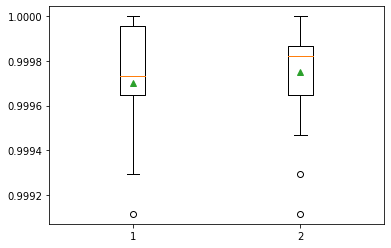

In [37]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, Y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = RandomForestClassifier(n_estimators= 600,
            min_samples_split= 2,
            min_samples_leaf= 1,
            max_features= 'sqrt',max_depth= 80,
            bootstrap= False)

    # evaluate model
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

repeats = range(1,3)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, Y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

# Checking the model for overfitting 

Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset.

The expectation is that as the depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the holdout test set.

>1, train: 0.725, test: 0.726
>2, train: 0.852, test: 0.855
>3, train: 0.908, test: 0.909
>4, train: 0.972, test: 0.970
>5, train: 0.984, test: 0.982
>6, train: 0.990, test: 0.989
>7, train: 0.996, test: 0.996
>8, train: 0.998, test: 0.997
>9, train: 0.999, test: 0.998
>10, train: 1.000, test: 0.999
>11, train: 1.000, test: 0.999
>12, train: 1.000, test: 0.999
>13, train: 1.000, test: 0.999
>14, train: 1.000, test: 0.999
>15, train: 1.000, test: 0.999
>16, train: 1.000, test: 0.999
>17, train: 1.000, test: 0.999
>18, train: 1.000, test: 0.999
>19, train: 1.000, test: 0.999
>20, train: 1.000, test: 0.999
>21, train: 1.000, test: 0.999
>22, train: 1.000, test: 0.999
>23, train: 1.000, test: 0.999
>24, train: 1.000, test: 0.999
>25, train: 1.000, test: 0.999
>26, train: 1.000, test: 0.999
>27, train: 1.000, test: 0.999
>28, train: 1.000, test: 0.999
>29, train: 1.000, test: 0.999
>30, train: 1.000, test: 0.999
>31, train: 1.000, test: 0.999
>32, train: 1.000, test: 0.999
>33, train: 1.000

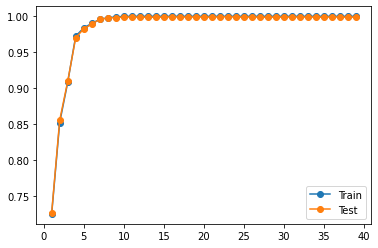

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)

train_scores, test_scores = list(), list()

values = [i for i in range(1, 40)]

for i in values:
    model = RandomForestClassifier(n_estimators= 600,
            min_samples_split= 2,
            min_samples_leaf= 1,
            max_features= 'sqrt',max_depth= i,
            bootstrap= False)

    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
    
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# Graphs

In [53]:
import matplotlib.pyplot as plt

In [60]:
import matplotlib.pyplot as plt
def plot_barh(x, y, title, x_label, y_label, file_name):
    plt.rcParams.update({'font.size': 18})
    #plt.rcParams.update({'font.color': 'green'})
    plt.rcParams["figure.figsize"] = [5, 12]
    fig, ax = plt.subplots()
    width = 0.65 # the width of the bars
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width)
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #Wirite labels on bar top
    for i, v in enumerate(y):
        ax.text(v, i - 0.2, str(v), color='red', fontsize=8)

    plt.savefig(file_name, bbox_inches='tight')
    plt.gcf().clear()
    plt.show()

In [61]:
result_df = result_metrics.groupby(by=['n_variables'], as_index=False).agg({'model':['count']}).sort_values(by=['n_variables'])
result_df = pd.DataFrame({'n_variables':np.array(result_df['n_variables']),
                          'model': np.array([i[0] for i in result_df['model'].values])})

result_df = result_df[np.abs(result_df.model-result_df.model.mean()) <= (3*result_df.model.std())]

x = np.array([7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,36,37,39]) # X-axis points
y = np.array([7,8,9,20,22,24,26,28,30,32,36,19,40,21,44,23,24,50,54,56,29,60,31,32,66,36,74,78]) # Y-axis points


In [63]:
plot_barh(x,y,'Model count Vs. Number of selected variables', 'Model count', 'Number of selected variables','result.pdf')

<Figure size 360x864 with 0 Axes>

In [114]:
result_df = result_metrics.groupby(by=['variables'], as_index=False).agg({'importance':['mean']}).sort_values(by=[('importance', 'mean')])
x = np.array(result_df['variables'].values)
y = np.array([round(i[0],4) for i in result_df['importance'].values])


In [115]:
plot_barh(x,y,'Mean of variables importance', 'Importance', 'Variables','var_importance.pdf')

<Figure size 360x864 with 0 Axes>

In [93]:
result_df = result_metrics.groupby(by=['n_variables'], as_index=False).agg({'accuracy':['mean']}).sort_values(by='n_variables')
x = np.array(result_df['n_variables'].values)
y = np.array([round(i[0],2) for i in result_df['accuracy'].values])

In [94]:
plot_barh(x,y,'Accuracy of models', 'Accuracy', 'Number of variables','accuracy.pdf')

<Figure size 3600x5400 with 0 Axes>

In [53]:
def plot_confusion_matrix(cm, precision, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, filename='.'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams.update({'font.size': 14})
    plt.rcParams["figure.figsize"] = [15, 12]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.xlabel('Predicted label (Precision=' + str(round(precision * 100, 2)) + '%)')
    # Save
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    plt.show()

In [54]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict

In [55]:
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [56]:
predictions = cross_val_predict(RandomForestClassifier(), X, Y, cv=10,verbose=1)
precision = round(precision_score(Y,predictions, average='weighted'),ndigits=4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.1min finished


In [59]:
cm = confusion_matrix(Y,predictions, labels=list(Y.unique()))

In [119]:
df['Label'].value_counts()

0    58250
3    15893
2    12802
4      218
1      196
Name: Label, dtype: int64

In [57]:
precision

0.9997

In [64]:
print(confusion_matrix)

[[9107    0    1    0    0]
 [   5  580    0    0    0]
 [   1    0 3003    0    0]
 [   2    0    0 3545    0]
 [   0    0    0    0  706]]


In [60]:
cm

array([[29998,     2,     0,     0,     0],
       [    3,  9997,     0,     0,     0],
       [    6,     0, 11994,     0,     0],
       [    7,     0,     0,  1993,     0],
       [    1,     0,     0,     0,  2499]])

In [65]:
plot_confusion_matrix(confusion_matrix, 0.999469 , list(Y.unique()),filename='cross.pdf')

Confusion matrix, without normalization
[[9107    0    1    0    0]
 [   5  580    0    0    0]
 [   1    0 3003    0    0]
 [   2    0    0 3545    0]
 [   0    0    0    0  706]]


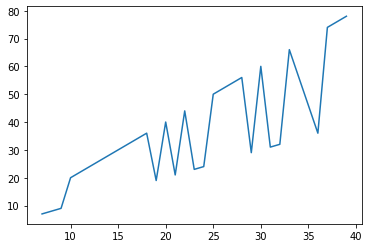

In [50]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = np.array([7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,36,37,39]) # X-axis points
y = np.array([7,8,9,20,22,24,26,28,30,32,36,19,40,21,44,23,24,50,54,56,29,60,31,32,66,36,74,78]) # Y-axis points

plt.plot(x, y) # Plot the chart
plt.show() # display
